In [2]:
import psycopg2
import seaborn as sns
import pandas as pd

# Weekday

## Sales per weekday

If we analyze all our data we can see that Monday is the day of the week in which there are more sales. This follows the trend that Monday is the day when people feel frustrated and stressed after the weekend and return to work. People are more likely to make compulsive purchases.

Sucessful connection


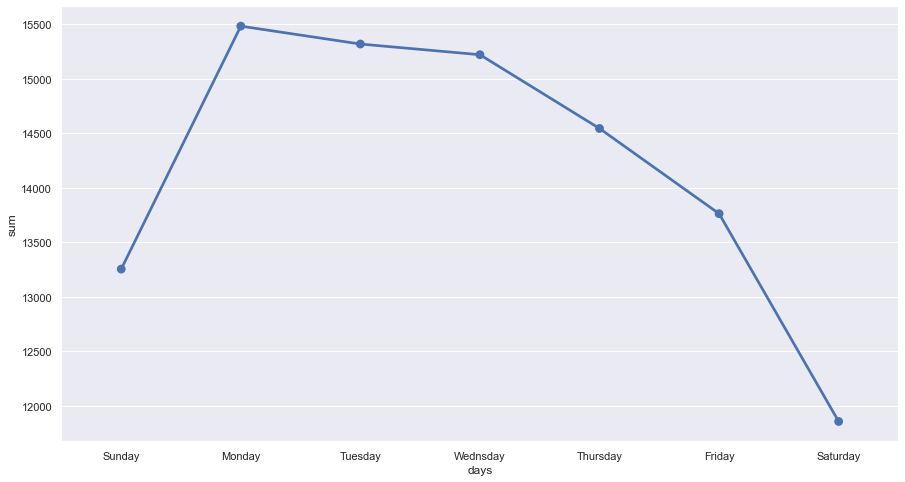

In [8]:
try:
    connection = psycopg2.connect(
        host = 'ec2-54-157-79-121.compute-1.amazonaws.com',
        user = 'okskipddgcuaix',
        password = 'f4389a6257140d0f66be8163b27d131299ec2aa73455aa07991669ea689eb008',
        database = 'd42ekpicafpt4b'
    )

    print('Sucessful connection')
    cursor = connection.cursor()
    # Sunday   Monday   Tuesday   Wednsday   Thursday   Friday   Saturday
    #   0        1         2         3           4        5         6
    cursor.execute("SELECT EXTRACT(DOW FROM order_purchase_timestamp), COUNT(order_purchase_timestamp)FROM orders_table GROUP BY EXTRACT(DOW FROM order_purchase_timestamp) ORDER BY EXTRACT(DOW FROM order_purchase_timestamp)")
    row = cursor.fetchall()

    weekday_list = ['Sunday', 'Monday', 'Tuesday', 'Wednsday', 'Thursday', 'Friday', 'Saturday']

    def weekday(number):
        return weekday_list[number]

    df = pd.DataFrame()
    df['days'] = list(weekday(int(a[0])) for a in row)
    df['sum'] = list(a[1] for a in row)

    sns.set(rc = {'figure.figsize':(15,8)})

    sns.pointplot(x = 'days', y = 'sum', markers = ["o"], linestyles = ["-"], data = df)

except Exception as ex:
    print(ex)

## Weekday sales per year

But if we analyze the same data per year we can find a different behavior. We have less information for 2016, we can solve this by normalizing our data. The easiest way to do this is by taking the highest number of sales for that year and use them as reference.

Sucessful connection


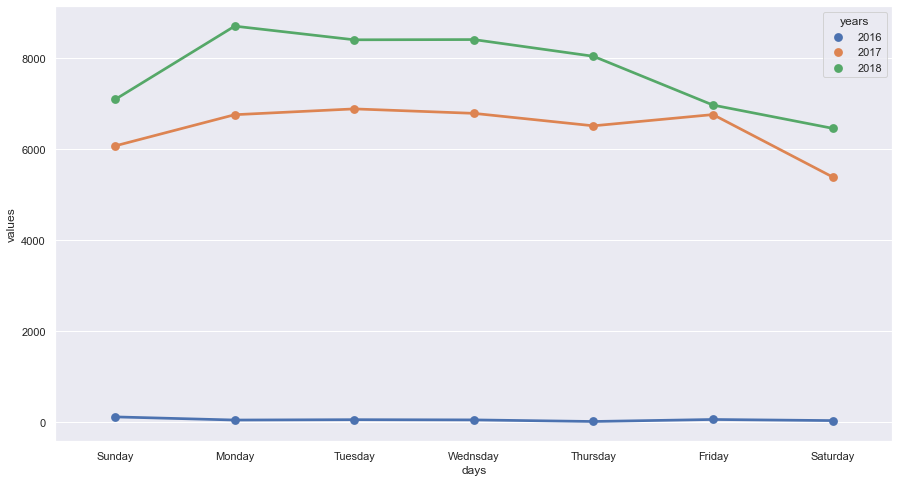

In [7]:
try:
    connection = psycopg2.connect(
        host = 'ec2-54-157-79-121.compute-1.amazonaws.com',
        user = 'okskipddgcuaix',
        password = 'f4389a6257140d0f66be8163b27d131299ec2aa73455aa07991669ea689eb008',
        database = 'd42ekpicafpt4b'
    )

    print('Sucessful connection')
    cursor = connection.cursor()
    # Sunday   Monday   Tuesday   Wednsday   Thursday   Friday   Saturday
    #   0        1         2         3           4        5         6
    cursor.execute("SELECT EXTRACT(DOW FROM order_purchase_timestamp), COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2016 GROUP BY EXTRACT(DOW FROM order_purchase_timestamp) ORDER BY EXTRACT(DOW FROM order_purchase_timestamp)")
    row = cursor.fetchall()

    cursor.execute("SELECT COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2017 GROUP BY EXTRACT(DOW FROM order_purchase_timestamp) ORDER BY EXTRACT(DOW FROM order_purchase_timestamp)")
    row2 = cursor.fetchall()

    cursor.execute("SELECT COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2018 GROUP BY EXTRACT(DOW FROM order_purchase_timestamp) ORDER BY EXTRACT(DOW FROM order_purchase_timestamp)")
    row3 = cursor.fetchall()

    weekday_list = ['Sunday', 'Monday', 'Tuesday', 'Wednsday', 'Thursday', 'Friday', 'Saturday']

    def weekday(number):
        return weekday_list[number]

    df = pd.DataFrame()
    days = [weekday(int(a[0])) for a in row]
    y2016 = [a[1] for a in row]
    y2017 = [a[0] for a in row2]
    y2018 = [a[0] for a in row3]

    df['years'] = [2016 for _ in days] + [2017 for _ in days] + [2018 for _ in days]
    df['days'] = days * 3
    df['values'] = y2016 + y2017 + y2018

    sns.set(rc = {'figure.figsize':(15,8)})
    
    sns.pointplot(x = 'days', y = 'values', hue = 'years', data = df)

except Exception as ex:
    print(ex)

## Weekday sales per year normalized

We obtain a more accurate visualization per year. And we can do the same per month.

Sucessful connection


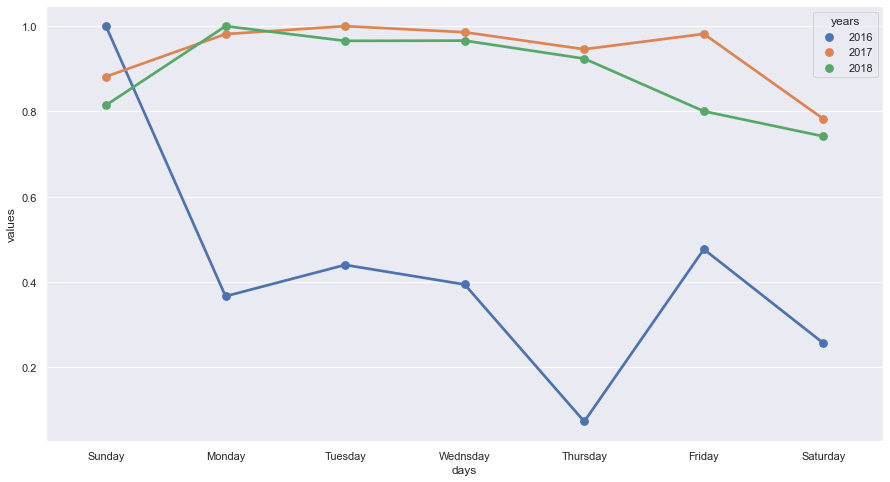

In [6]:
try:
    connection = psycopg2.connect(
        host = 'ec2-54-157-79-121.compute-1.amazonaws.com',
        user = 'okskipddgcuaix',
        password = 'f4389a6257140d0f66be8163b27d131299ec2aa73455aa07991669ea689eb008',
        database = 'd42ekpicafpt4b'
    )

    print('Sucessful connection')
    cursor = connection.cursor()
    # Sunday   Monday   Tuesday   Wednsday   Thursday   Friday   Saturday
    #   0        1         2         3           4        5         6
    cursor.execute("SELECT EXTRACT(DOW FROM order_purchase_timestamp), COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2016 GROUP BY EXTRACT(DOW FROM order_purchase_timestamp) ORDER BY EXTRACT(DOW FROM order_purchase_timestamp)")
    row = cursor.fetchall()

    cursor.execute("SELECT COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2017 GROUP BY EXTRACT(DOW FROM order_purchase_timestamp) ORDER BY EXTRACT(DOW FROM order_purchase_timestamp)")
    row2 = cursor.fetchall()

    cursor.execute("SELECT COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2018 GROUP BY EXTRACT(DOW FROM order_purchase_timestamp) ORDER BY EXTRACT(DOW FROM order_purchase_timestamp)")
    row3 = cursor.fetchall()

    weekday_list = ['Sunday', 'Monday', 'Tuesday', 'Wednsday', 'Thursday', 'Friday', 'Saturday']

    def weekday(number):
        return weekday_list[number]
    
    def normalize(array):
        max_int = max(array)
        return list(map(lambda x: x / max_int, array))


    df = pd.DataFrame()
    days = [weekday(int(a[0])) for a in row]
    y2016 = normalize([a[1] for a in row])
    y2017 = normalize([a[0] for a in row2])
    y2018 = normalize([a[0] for a in row3])

    df['years'] = [2016 for _ in days] + [2017 for _ in days] + [2018 for _ in days]
    df['days'] = days * 3
    df['values'] = y2016 + y2017 + y2018

    sns.set(rc = {'figure.figsize':(15,8)})

    sns.pointplot(x = 'days', y = 'values', hue = 'years', data = df)

except Exception as ex:
    print(ex)

# Month

## sales per month

Sucessful connection


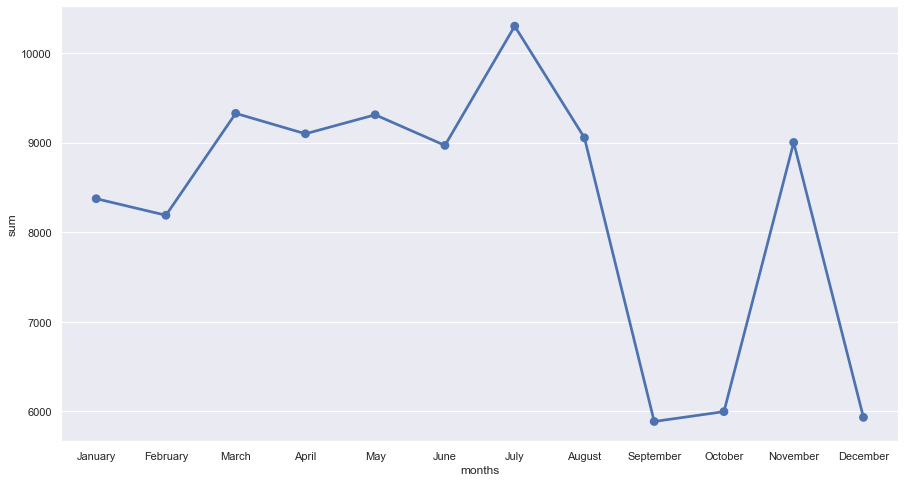

In [5]:
try:
    connection = psycopg2.connect(
        host = 'ec2-54-157-79-121.compute-1.amazonaws.com',
        user = 'okskipddgcuaix',
        password = 'f4389a6257140d0f66be8163b27d131299ec2aa73455aa07991669ea689eb008',
        database = 'd42ekpicafpt4b'
    )

    print('Sucessful connection')
    cursor = connection.cursor()
    # Sunday   Monday   Tuesday   Wednsday   Thursday   Friday   Saturday
    #   0        1         2         3           4        5         6
    cursor.execute("SELECT EXTRACT(MONTH FROM order_purchase_timestamp), COUNT(order_purchase_timestamp)FROM orders_table GROUP BY EXTRACT(MONTH FROM order_purchase_timestamp) ORDER BY EXTRACT(MONTH FROM order_purchase_timestamp)")
    row = cursor.fetchall()

    weekday_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    def month(number):
        return weekday_list[number-1]

    df = pd.DataFrame()
    df['months'] = list(month(int(a[0])) for a in row)
    df['sum'] = list(a[1] for a in row)

    sns.set(rc = {'figure.figsize':(15,8)})

    sns.pointplot(x = 'months', y = 'sum', markers = ["o"], linestyles = ["-"], data = df)

except Exception as ex:
    print(ex)

## Month sales per year

Sucessful connection


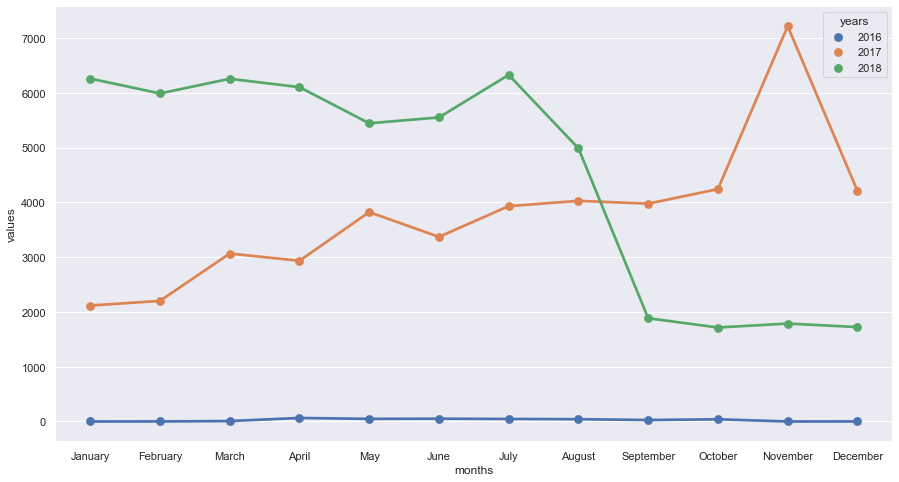

In [4]:
try:
    connection = psycopg2.connect(
        host = 'ec2-54-157-79-121.compute-1.amazonaws.com',
        user = 'okskipddgcuaix',
        password = 'f4389a6257140d0f66be8163b27d131299ec2aa73455aa07991669ea689eb008',
        database = 'd42ekpicafpt4b'
    )

    print('Sucessful connection')
    cursor = connection.cursor()
    # Sunday   Monday   Tuesday   Wednsday   Thursday   Friday   Saturday
    #   0        1         2         3           4        5         6
    cursor.execute("SELECT EXTRACT(MONTH FROM order_purchase_timestamp), COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2016 GROUP BY EXTRACT(MONTH FROM order_purchase_timestamp) ORDER BY EXTRACT(MONTH FROM order_purchase_timestamp)")
    row = cursor.fetchall()

    cursor.execute("SELECT COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2017 GROUP BY EXTRACT(MONTH FROM order_purchase_timestamp) ORDER BY EXTRACT(MONTH FROM order_purchase_timestamp)")
    row2 = cursor.fetchall()

    cursor.execute("SELECT COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2018 GROUP BY EXTRACT(MONTH FROM order_purchase_timestamp) ORDER BY EXTRACT(MONTH FROM order_purchase_timestamp)")
    row3 = cursor.fetchall()

    weekday_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    def month(number):
        return weekday_list[number-1]

    df = pd.DataFrame()
    y2016 = [0] + [a[1] for a in row]
    y2016.insert(10, 0)
    y2017 = [a[0] for a in row2]
    y2018 = [a[0] for a in row3]

    df['years'] = [2016 for _ in y2016] + [2017 for _ in y2016] + [2018 for _ in y2016]
    df['months'] = weekday_list * 3
    df['values'] = y2016 + y2017 + y2018

    sns.set(rc = {'figure.figsize':(15,8)})
    
    sns.pointplot(x = 'months', y = 'values', hue = 'years', data = df)

except Exception as ex:
    print(ex)

## Month sales per year normalized

Sucessful connection


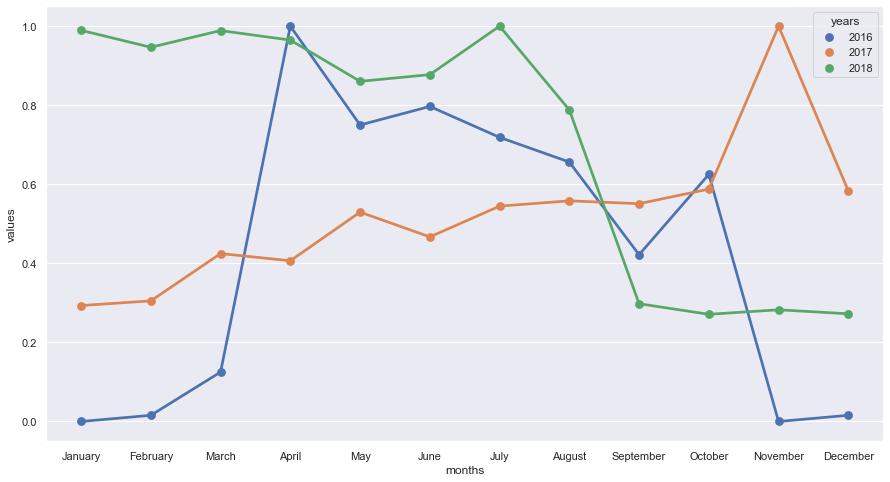

In [3]:
try:
    connection = psycopg2.connect(
        host = 'ec2-54-157-79-121.compute-1.amazonaws.com',
        user = 'okskipddgcuaix',
        password = 'f4389a6257140d0f66be8163b27d131299ec2aa73455aa07991669ea689eb008',
        database = 'd42ekpicafpt4b'
    )

    print('Sucessful connection')
    cursor = connection.cursor()
    # Sunday   Monday   Tuesday   Wednsday   Thursday   Friday   Saturday
    #   0        1         2         3           4        5         6
    cursor.execute("SELECT EXTRACT(MONTH FROM order_purchase_timestamp), COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2016 GROUP BY EXTRACT(MONTH FROM order_purchase_timestamp) ORDER BY EXTRACT(MONTH FROM order_purchase_timestamp)")
    row = cursor.fetchall()

    cursor.execute("SELECT COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2017 GROUP BY EXTRACT(MONTH FROM order_purchase_timestamp) ORDER BY EXTRACT(MONTH FROM order_purchase_timestamp)")
    row2 = cursor.fetchall()

    cursor.execute("SELECT COUNT(order_purchase_timestamp) FROM orders_table WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2018 GROUP BY EXTRACT(MONTH FROM order_purchase_timestamp) ORDER BY EXTRACT(MONTH FROM order_purchase_timestamp)")
    row3 = cursor.fetchall()

    weekday_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    def month(number):
        return weekday_list[number-1]

    def normalize(array):
        max_int = max(array)
        return list(map(lambda x: x / max_int, array))


    df = pd.DataFrame()
    y2016 = normalize([0] + [a[1] for a in row])
    y2016.insert(10, 0)
    y2017 = normalize([a[0] for a in row2])
    y2018 = normalize([a[0] for a in row3])

    df['years'] = [2016 for _ in y2016] + [2017 for _ in y2016] + [2018 for _ in y2016]
    df['months'] = weekday_list * 3
    df['values'] = y2016 + y2017 + y2018

    sns.set(rc = {'figure.figsize':(15,8)})
    
    sns.pointplot(x = 'months', y = 'values', hue = 'years', data = df)

except Exception as ex:
    print(ex)